In [2]:
import pydicom
from pydicom.data import get_testdata_file
import matplotlib.pyplot as plt

# get some test data
filename = get_testdata_file("CT_small.dcm")
ds = pydicom.dcmread(filename)




In [11]:
filepath = r"C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000001.dcm"
dsct = pydicom.dcmread(filepath)

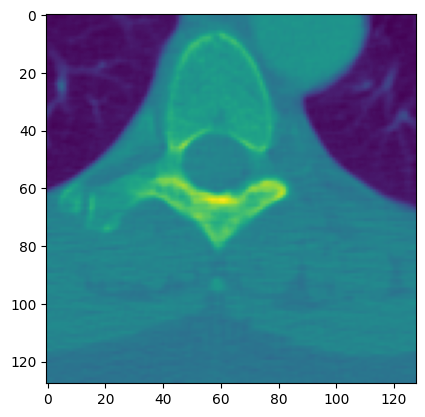

In [3]:
plt.imshow(ds.pixel_array)
plt.show()

In [43]:
a = 50
i0 = 256
j0 = 256
for i in range(dsct.pixel_array.shape[0]):
    for j in range(dsct.pixel_array.shape[1]):
        if (i-i0)**2 + (j-j0)**2 <= a**2:
            dsct.pixel_array[i,j] = 4000

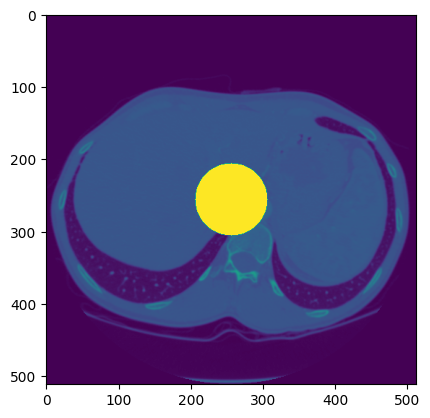

In [44]:
plt.imshow(dsct.pixel_array)
plt.show()

loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000001.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000002.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000003.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000004.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000005.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000006.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000007.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000008.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000009.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000010.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000011.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000012.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-000001\image-000013.dcm
loading: C:\Users\Mikhail\Desktop\CT_code\series-00

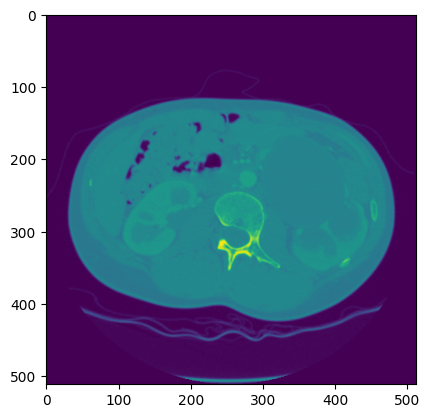

In [24]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
files = []
#print('glob: {}'.format(sys.argv[1]))
path=r'C:\Users\Mikhail\Desktop\CT_code\series-000001\*'
for fname in glob.glob(path, recursive=False):
    print("loading: {}".format(fname))
    files.append(pydicom.dcmread(fname))

print("file count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
# a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2])
# a1.set_aspect(ax_aspect)

# a2 = plt.subplot(2, 2, 2)
# plt.imshow(img3d[:, img_shape[1]//2, :])
# a2.set_aspect(sag_aspect)

# a3 = plt.subplot(2, 2, 3)
# plt.imshow(img3d[img_shape[0]//2, :, :].T)
# a3.set_aspect(cor_aspect)

plt.show()

In [22]:
glob.glob(r'C:\Users\Mikhail\Desktop\CT_code\series-000001\*', recursive=False)

['C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000001.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000002.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000003.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000004.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000005.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000006.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000007.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000008.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000009.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000010.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000011.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000012.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code\\series-000001\\image-000013.dcm',
 'C:\\Users\\Mikhail\\Desktop\\CT_code

In [47]:
dsct.pixel_array.shape

(512, 512)